# Desafío - Análisis lineal discriminante
## Daniela Hurtado

__Descripción__
Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:

* default : Variable Binaria. Registra si el cliente entró en morosidad o no.
* income : Ingreso promedio declarado por el cliente.
* balance : total del sando en la cuenta de crédito.
* student : Variable binaria. Registra si el cliente es estudiante o no.

## Ejercicio 1: Preparación de ambiente de trabajo

* Importe los módulos básicos para el análisis de datos.
* Importe las clases LabelEncoder , StandardScaler y LabelBinarizer de preprocessing
* Importe las funciones train_test_split y cross_val_score de model_selection
* Importe la función classification_report de metrics
* Importe las clases LinearDiscriminantAnalysis y QuadraticDiscriminantAnalysis .
* Agregue la base de datos en el ambiente de trabajo.
* Inspeccione la distribución de cada atributo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn')

from sklearn.preprocessing import LabelEncoder #transforma etiquetas a numericas
from sklearn.preprocessing import StandardScaler #Estandariza matrices de atributos
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split # separa datos de entrenamiento y testeo
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis# efecto lineal
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
df = pd.read_csv('default_credit.csv')

In [3]:
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
df =df.drop('index', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


__Histogramas__

In [6]:
def plot_hist(dataframe, variable):
    '''
    Docstring: La función plot_hist tiene como parametros: un dataframe y la variable a analizar,
    como resultado entregara un histograma con los valores de la variable, la media y la mediana.
    '''
    tmp = dataframe[variable].dropna()
    media = np.mean(tmp)
    mediana = np.median(tmp)
    
    plt.hist(tmp, alpha=.6, color='skyblue')
    plt.axvline(media, color='blue', linestyle='--', lw=2, label='Media {}'.format(round(media, 2)))
    plt.axvline(mediana, color='fuchsia', linestyle='--', lw=2, label='Mediana {}'.format(round(mediana, 2)))
    plt.title('Histograma {}'.format(variable))
    plt.legend()
    plt.show()

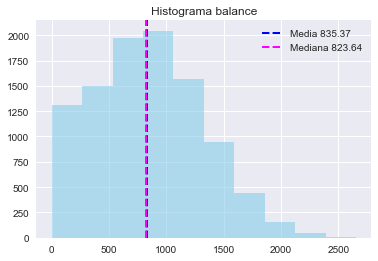

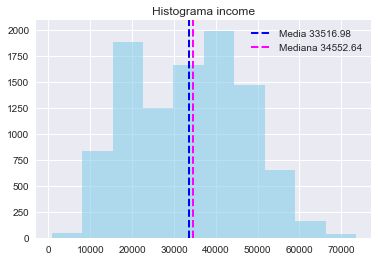

In [7]:
continuas = ['balance', 'income']
for i in continuas:
    plot_hist(df, i)

__Boxplot__

In [8]:
def boxplot(dataframe,variable):
    sns.boxplot(x=dataframe[variable])
    plt.show()

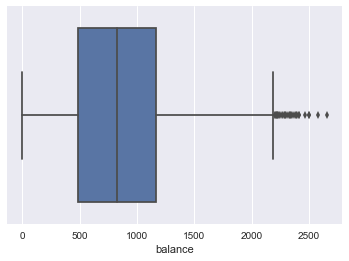

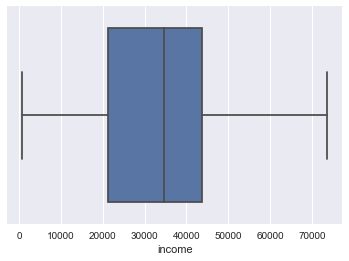

In [9]:
for i in continuas:
    boxplot(df,i)
    

__Graficos de Barra__

In [10]:
def grafico_barras(dataframe, variable):
    '''
    Docstring: La funcion grafico_barras tiene como parámetros un dataframe y la variable a analizar,
    como resultado nos entregará un grafico de barras con los valores de la variable.
    '''
    plt.figure()
    sns.countplot(y = dataframe[variable],
                 order = dataframe[variable].value_counts().index) 

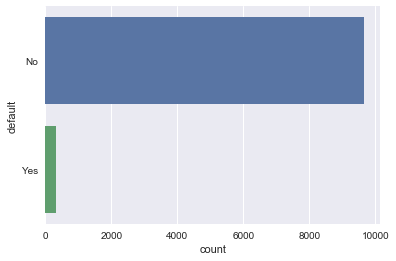

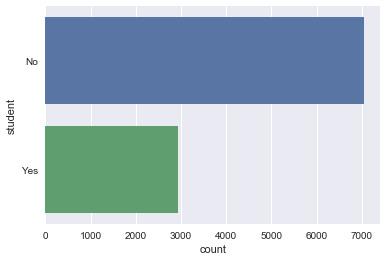

In [11]:
categoricas = ['default', 'student']
for i in categoricas:
    grafico_barras(df, i)

## Ejercicio 2: Modelo base

* Recuerde que los modelos de sklearn no soportan datos que no sean numéricos. Transforme los atributos pertinentes con LabelEncoder .
* Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.
* Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiperparámetros.
* Genere métricas de evaluación utilizando classification_report .
* Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

In [12]:
# hacemos un value_counts para ver la cantidad de datos de la variable default
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [13]:
# reemplazamos a numericos
df['default'] = LabelEncoder().fit_transform(df['default'])
df['student'] = LabelEncoder().fit_transform(df['student'])

In [14]:
# hacemos un nuevo value_counts() para saber cual variable es 0 y cual es 1
df['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [34]:
# creamos los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'student':'income'],
                                                    df['default'], test_size=.33, random_state=23748)

In [35]:
# instanciamos el modelo  con LinearDiscriminantAnalysis sin modificar los hiperparámetros
lda_model = LinearDiscriminantAnalysis()
# entrenamos el modelo
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [36]:
# mediaremos el desempeño. Guardaremos las predicciones de clases
lda_class_pred = lda_model.predict(X_test)
lda_class_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
# Reporte clasificación
print(classification_report(y_test, lda_class_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3184
           1       0.83      0.22      0.34       116

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.90      0.61      0.66      3300
weighted avg       0.97      0.97      0.96      3300



In [38]:
print("Probabilidades a priori\n", lda_model.priors_, "\n")
print("Medias de atributos en cada clase\n", lda_model.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n", lda_model.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.96761194 0.03238806] 

Medias de atributos en cada clase
 [[2.900000e-01 8.028200e+02 3.355924e+04]
 [4.100000e-01 1.759110e+03 3.084479e+04]] 

Varianza explicada por cada discriminante
 [1.] 



## Ejercicio 3: Refactorización 1 - información a priori

* Dado que trabajamos con modelos generativos, podemos incluír información exógena. Para este caso agregaremos dos distribuciones:
    * Asumamos que hay un 50/50 de morosos y no morosos.
    * Asumamos que hay un 60/40 de morosos y no morosos.
* Por cada modelo, reporte las métricas de clasificación.

__Modelo 50/50__

In [39]:
lda_model_1= LinearDiscriminantAnalysis(priors = [0.5, 0.5])
lda_model_1.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=[0.5, 0.5],
              shrinkage=None, solver='svd', store_covariance=False,
              tol=0.0001)

In [40]:
# mediaremos el desempeño. Guardaremos las predicciones de clases
lda_class_pred_1 = lda_model_1.predict(X_test)
lda_class_pred_1

array([0, 0, 0, ..., 1, 0, 0])

In [41]:
# Reporte clasificación
print(classification_report(y_test, lda_class_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3184
           1       0.18      0.91      0.30       116

   micro avg       0.85      0.85      0.85      3300
   macro avg       0.59      0.88      0.61      3300
weighted avg       0.97      0.85      0.89      3300



__Modelo 60/40__

In [42]:
lda_model_2= LinearDiscriminantAnalysis(priors = [0.6, 0.4])
lda_model_2.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=[0.6, 0.4],
              shrinkage=None, solver='svd', store_covariance=False,
              tol=0.0001)

In [45]:
# mediaremos el desempeño. Guardaremos las predicciones de clases
lda_class_pred_2 = lda_model_2.predict(X_test)
lda_class_pred_2

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
# Reporte clasificación
print(classification_report(y_test, lda_class_pred_2))

              precision    recall  f1-score   support

           0       0.99      0.88      0.94      3184
           1       0.21      0.85      0.34       116

   micro avg       0.88      0.88      0.88      3300
   macro avg       0.60      0.87      0.64      3300
weighted avg       0.97      0.88      0.91      3300



## Ejercicio 4: Refactorización 2 - oversampling

* Uno de los problemas más graves de esta base de datos, es el fuerte desbalance entre clases.
Ahora generaremos observaciones sintéticas mediante SMOTE (Synthetic Minority
Oversampling Technique). Para ello, debemos agregar el paquete a nuestro ambiente virtual. En
nuestro terminal agregamos conda install -c conda-forge imbalanced-learn . Incorpore
SMOTE en el ambiente de trabajo con la siguiente sintáxis from imblearn.over_sampling
import SMOTE .
* Para implementar oversampling, debemos generar nuevos objetos que representan nuestra
muestra de entrenamiento incrementada artificialmente. Para ello implemente la siguiente
sintáxis:

from imblearn.over_sampling import SMOTE

#Instanciamos la clase

oversampler = SMOTE(random_state=11238, ratio='minority')

#generamos el eversampling de la matriz de entrenamiento y

X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

* Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su
desempeño.

In [47]:
from imblearn.over_sampling import SMOTE 

In [48]:
# Instanciamos la clase
oversampler = SMOTE(random_state=11238, ratio='minority')
# generamos el oversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

In [49]:
lda_model_3 = LinearDiscriminantAnalysis()
lda_model_3.fit(X_train_oversamp, y_train_oversamp)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [50]:
# mediaremos el desempeño. Guardaremos las predicciones de clases
lda_class_pred_3 = lda_model_3.predict(X_test)
lda_class_pred_3

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
# Reporte clasificación
print(classification_report(y_test, lda_class_pred_3))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3184
           1       0.18      0.91      0.30       116

   micro avg       0.85      0.85      0.85      3300
   macro avg       0.59      0.88      0.61      3300
weighted avg       0.97      0.85      0.90      3300



* Con Precision, Recall y F1 logramos caracterizar las tasas de predicción exitosa del modelo.



* __Precision__ ¿Qué proporción de identificaciones positivas fue correcta?

El reporte entrega valores altos en cuanto a los clientes no morosos, lo que significa que el algoritmo predice más resultados relevantes que irrelevantes. No asi con los clientes morosos ya que alcanza solo un 0.18 acertando solo en un 18% la predicción de estos clientes.

* __Recall__ ¿Qué proporción de positivos reales se identificó correctamente?

Nuestro modelo tiene una recuperación de 0.91. Es decir, identifica correctamente el 91% de los clientes morosos.



## Ejercicio 5: Refactorización 3 - QDA

* Por último, implemente un modelo QuadraticDiscriminantAnalysis con los datos aumentados artificialmente. Genere las métricas de desempeño.

* Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.

In [52]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_oversamp, y_train_oversamp)
qda_predict = qda_model.predict(X_test)
qda_predict

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
# Reporte clasificación
print(classification_report(y_test, qda_predict))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3184
           1       0.21      0.86      0.33       116

   micro avg       0.88      0.88      0.88      3300
   macro avg       0.60      0.87      0.63      3300
weighted avg       0.97      0.88      0.91      3300



Las metricas cambiaron levemente. En cuanto a los no morosos disminuyó precision y aumento recall, de manera contraria en los
morosos aumento precision y disminuyo recall
